In [17]:
#Importing librarys
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
#Set images path
directory = "./Images"
df_label = pd.read_csv("./metadata.csv")

In [19]:
#Reading images
images = []
labels = []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        filepath = os.path.join(directory,filename)
        label = int(df_label[df_label["filename"] == filename]["label"])
        image = cv2.imread(filepath)
        image = cv2.resize(image,(224,224))
        images.append(image)
        labels.append(label)

In [20]:
print("m exemples : ",np.array(images).shape)

m exemples :  (237, 224, 224, 3)


In [21]:
#Applying data augmentation since we dont have enougth data :
augmented_images = []
augmented_labels = []
for image,label in zip(images, labels):
    augmented_image = cv2.flip(image,1)
    augmented_images.append(augmented_image)
    augmented_labels.append(label)
images += augmented_images
labels += augmented_labels

In [22]:
#Spliting data 
images = np.array(images)
labels = np.array(labels)
X = np.array(images)
y = np.array(labels) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
#Applying normalization
X_train = X_train / 255.0
X_test =  X_test / 255.0

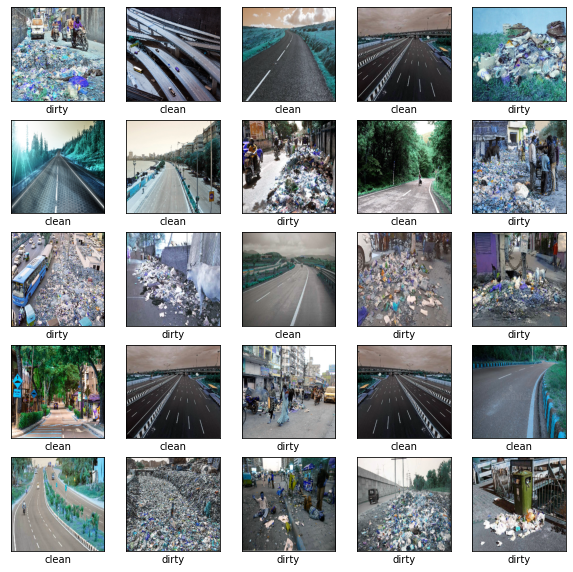

In [24]:
classes = {1:"dirty",0:"clean"}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [25]:
#Transfer learning on VGG-16
from tensorflow.keras.applications.vgg16 import VGG16
#Loading the pre-trained model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [26]:
#Freeze pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

In [29]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential
#Model
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(128,activation='relu'),
    Dense(len(classes),activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
11/11 [==============================] - 49s 5s/step - loss: 1.0654 - accuracy: 0.7613 - val_loss: 0.2205 - val_accuracy: 0.8811
Epoch 2/5
11/11 [==============================] - 51s 5s/step - loss: 0.0868 - accuracy: 0.9758 - val_loss: 0.0723 - val_accuracy: 0.9650
Epoch 3/5
11/11 [==============================] - 50s 5s/step - loss: 0.0298 - accuracy: 0.9879 - val_loss: 0.0807 - val_accuracy: 0.9650
Epoch 4/5
11/11 [==============================] - 51s 5s/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 0.9860
Epoch 5/5
11/11 [==============================] - 51s 5s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9930


In [38]:
loss,accuracy = model.evaluate(X_test,y_test)

5/5 [==============================] - 14s 3s/step - loss: 0.0253 - accuracy: 0.9930


In [76]:
print("Test set accuracy : ",accuracy)

Test set accuracy :  0.9930070042610168
